In [1]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
fimportance = f_classif(X, y)

print('features', X.columns.values)
print('scores', fimportance[0])
print('pvalues', fimportance[1])

features ['pelvic_incidence' 'pelvic_tilt' 'lumbar_lordosis_angle' 'sacral_slope'
 'pelvic_radius' 'degree_spondylolisthesis']
scores [ 98.53970917  21.29919433 114.98284047  89.6439533   16.86693476
 119.12288061]
pvalues [8.75284896e-34 2.17687915e-09 5.35732939e-38 2.17567036e-31
 1.12199590e-07 5.11473208e-39]


/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py

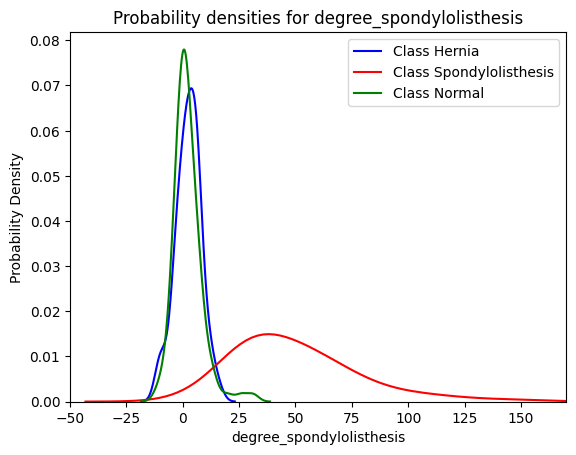

/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nunogoncalves/Desktop/Apre/apre-project/myenv/lib64/python3.11/site-packages/seaborn/_oldcore.py

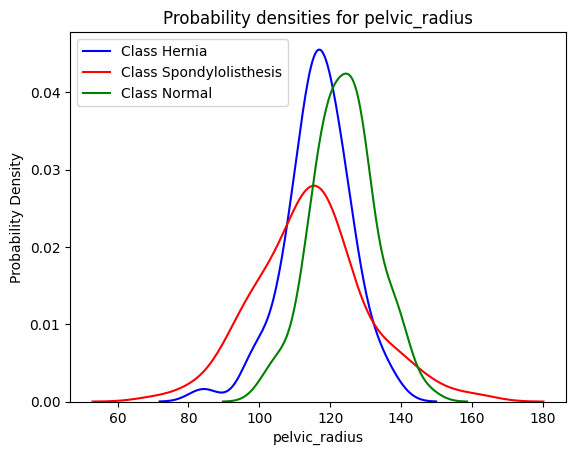

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df.loc[df['class'] == 'Hernia', 'degree_spondylolisthesis'], label='Class Hernia', color='blue')
sns.kdeplot(df.loc[df['class'] == 'Spondylolisthesis', 'degree_spondylolisthesis'], label='Class Spondylolisthesis', color='red')
sns.kdeplot(df.loc[df['class'] == 'Normal', 'degree_spondylolisthesis'], label='Class Normal', color='green')

plt.xlabel('degree_spondylolisthesis')
plt.ylabel('Probability Density')
plt.title('Probability densities for degree_spondylolisthesis')
plt.legend()
plt.xlim(-50 , 170)
plt.show()

sns.kdeplot(df.loc[df['class'] == 'Hernia', 'pelvic_radius'], label='Class Hernia', color='blue')
sns.kdeplot(df.loc[df['class'] == 'Spondylolisthesis', 'pelvic_radius'], label='Class Spondylolisthesis', color='red')
sns.kdeplot(df.loc[df['class'] == 'Normal', 'pelvic_radius'], label='Class Normal', color='green')

plt.xlabel('pelvic_radius')
plt.ylabel('Probability Density')
plt.title('Probability densities for pelvic_radius')
plt.legend()
plt.show()

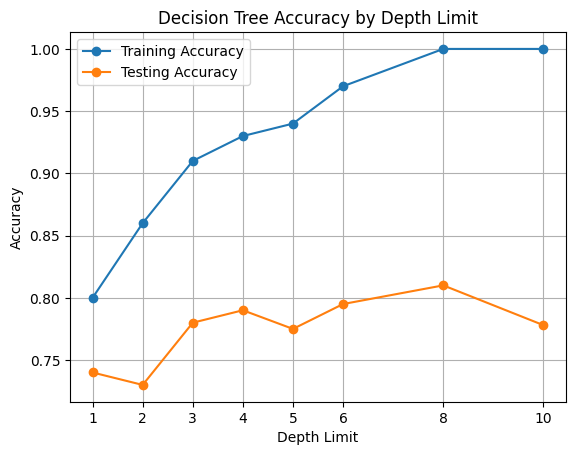

In [3]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]
train_accuracies = []
test_accuracies = []

for depth_limit in depth_limits:
    training_accuracy_sum = 0
    testing_accuracy_sum = 0

    for _ in range(10):
        predictor = tree.DecisionTreeClassifier(max_depth=depth_limit)
        predictor.fit(X_train, y_train)

        training_accuracy_sum += round(metrics.accuracy_score(y_train, predictor.predict(X_train)), 2)
        testing_accuracy_sum += round(metrics.accuracy_score(y_test, predictor.predict(X_test)), 2)

    train_accuracies.append(training_accuracy_sum / 10)
    test_accuracies.append(testing_accuracy_sum / 10)

plt.plot(depth_limits, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Accuracy by Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.xticks(depth_limits)
plt.legend()
plt.grid()
plt.show()

Analisando o gráfico anterior, podemos constatar que a accuracy do modelo é maior quando aplicado aos dados de treino do que quando aplicado aos dados de teste.
Tipicamente, isto indica que estamos perante um caso de overfitting, isto é, o modelo aprendeu padrões demasiado específicos aos dados de treino, resultando numa menor accuracy quando aplicado aos dados de teste.
Desta forma, obtivemos um modelo pouco generalizado que não está adaptado à população.

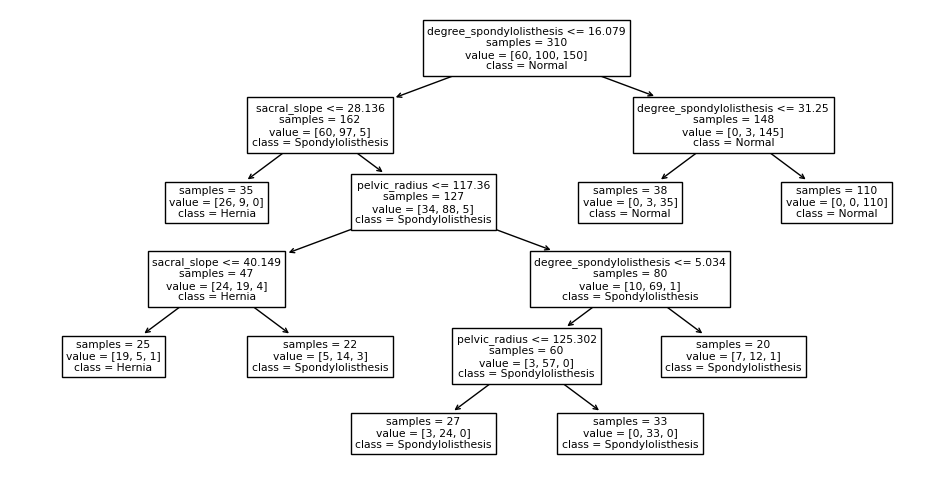

In [4]:
predictor = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
predictor.fit(X, y)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=X.columns.to_list(), class_names=list(y.unique()), impurity=False)
plt.show()